### Clase 6 - Integrales

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

Integral
$$
 \int_{x_i-h}^{x_i + h} f(x) \, dx \approx \frac{f(x_{i-1})+4f(x_{i})+f(x_{i-1})}{3}h
$$

parte asimétrica

$$
 \int_{x_0}^{x_0 + h} f(x) \, dx \approx \frac{23 f(x_{0})+ 26f(x_{1}) - 4f(x_{2}) + 6f(x_{3}) - 3f(x_{4}) }{48}h
$$

In [2]:
def integrar_feo(f, x):
    '''
    Regresa la integral de la función, no la primitiva
    
    int_f = Acumulador de las integrales de cada 2 intervalos
    N = Número de intervalos de integración [x_i-h, x_i+h]
    '''
    int_f, N , h = 0, (len(f)-1)//2, abs(x[0] - x[1])
    
    for i in range(N):
        j = i*2 + 1
        int_f += f[j+1] + 4*f[j] + f[j-1]

    int_f = int_f*h/3.0
            
    if (len(f)-1) % 2 == 1:
        # Numero impar de intervalos [x_i, x_i+h]
        int_f += -(23*f[-1] + 26*f[-2] - 4*f[-3] + 6*f[-4] -3*f[-5])*h/48.0 
    
    return int_f

In [3]:
def integrar(f, x):
    '''
    Regresa la integral de la función, no la primitiva
    
    int_f = Acumulador de las integrales de cada 2 intervalos
    N = Número de intervalos de integración [x_i, x_i+h]
    '''
    int_f, N, h = 0, len(f)-1, abs(x[0] - x[1])

    if len(f) < 5:
        raise Exception("Perdón, ingresa una 'f' con al menos 5 valores") 

    for i in range(1,N,2):
        int_f += f[i+1] + 4*f[i] + f[i-1]

    int_f = int_f*h/3.0
    
    if N % 2 == 1:
        # Numero impar de intervalos [x_i, x_i+h]
        int_f += -(23*f[-1] + 26*f[-2] - 4*f[-3] + 6*f[-4] -3*f[-5])*h/48.0 

    return int_f

In [4]:
x = np.linspace(0,-m.pi,1000)
y = np.sin(x)

print(integrar(y,x))

-1.9999901106196791


In [5]:
%time
integrar_feo(y,x)

CPU times: user 2 μs, sys: 0 ns, total: 2 μs
Wall time: 3.34 μs


-1.9999901106196791

In [6]:
%time
integrar(y,x)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.15 μs


-1.9999901106196791

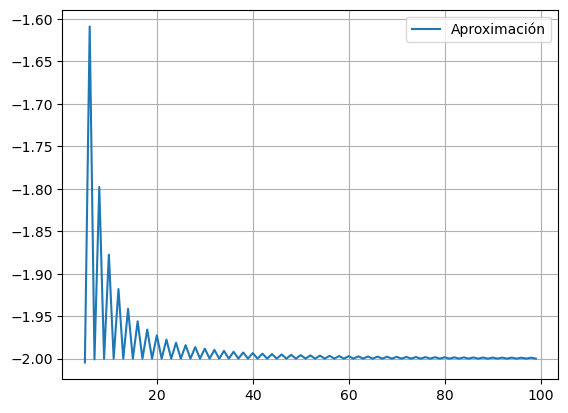

In [7]:
elementos = 100
num = np.zeros(elementos)
integrales = np.zeros(elementos)
for i in range(5,elementos):
    x = np.linspace(0,-m.pi,i)
    y = np.sin(x)
    num[i] = i
    integrales[i] = integrar(y,x)

plt.plot(num[5:], integrales[5:], label=r"Aproximación")
plt.grid(), plt.legend(),
plt.show()

In [8]:
# TODO
def primitiva(f, x):
    '''
    Obtiene la primitiva de una función
    
    N = Número de intervalos de integración [x_i, x_i+h]
    '''
    F, N, h = np.zeroslike(f), len(f)-1, abs(x[0] - x[1])

    if len(f) < 5:
        raise Exception("Perdón, ingresa una 'f' con al menos 5 valores") 

    for i in range(N ):
        int_f += f[i+1] + 4*f[i] + f[i-1]

    int_f = int_f*h/3.0
    
    if N % 2 == 1:
        # Numero impar de intervalos [x_i, x_i+h]
        int_f += -(23*f[-1] + 26*f[-2] - 4*f[-3] + 6*f[-4] -3*f[-5])*h/48.0 

    return F